This is a MNIST digit recognition without a hidden layer. it was just the input and output layers with softmax activation function, cross entropy as loss function, batch size of 100 and in the range of 1000.

#**Load the dataset**

In [0]:
import tensorflow as tf
from  tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST/DATA', one_hot = True)


Extracting MNIST/DATA/train-images-idx3-ubyte.gz
Extracting MNIST/DATA/train-labels-idx1-ubyte.gz
Extracting MNIST/DATA/t10k-images-idx3-ubyte.gz
Extracting MNIST/DATA/t10k-labels-idx1-ubyte.gz


In [0]:
x_train = mnist.train.images
y_train = mnist.train.labels
x_val = mnist.validation.images
y_val = mnist.validation.labels
x_test = mnist.test.images
y_test = mnist.test.labels

the shapes of the training and test data

In [0]:
print('The shape of the training set is: {0}, this means that it has {1} examples'.format(x_train.shape, y_train.shape[0]))
print('The shape of the validation set is: {0}, this means that it has {1} examples'.format(x_val.shape, y_val.shape[0]))
print('The shape of the test set is: {0}, this means that it has {1} examples'.format(x_test.shape, y_test.shape[0]))

The shape of the training set is: (55000, 784), this means that it has 55000 examples
The shape of the validation set is: (5000, 784), this means that it has 5000 examples
The shape of the test set is: (10000, 784), this means that it has 10000 examples


In [0]:
#overview of the values in a pixel(28 by 28)
print(x_train[54999])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

# Build a softmax regression model(1 layer neural network) and train on the dataset

Build a computational graph

In [0]:
#inputs
x = tf.placeholder(tf.float32,[None,784])
#labels(one hot encoded)
y = tf.placeholder(tf.float32,[None,10])
#weights
w = tf.Variable(tf.truncated_normal([784,10],stddev = 0.1), name = 'w')
#biases
b = tf.Variable(tf.zeros([10]))


#weighted sum
z = tf.matmul(tf.reshape(x,[-1,784]),w)+b

#softmax activation
h = tf.nn.softmax(z)

#softmax cross entropy loss 
cross_entropy = -tf.reduce_sum(y*tf.log(h))

#accuracy of the trained model between worst(0) and best(1)
is_correct = tf.equal(tf.argmax(y,1),tf.argmax(h,1))
accuracy = tf.reduce_mean(tf.cast(is_correct,tf.float32))

learning_rate = 0.001

optimizer = tf.train.GradientDescentOptimizer(learning_rate)
train_step = optimizer.minimize(cross_entropy)

#initialize all variables
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

for i in range(50):
  batch_x, batch_y = mnist.train.next_batch(100)
  train_data = {x:batch_x, y:batch_y}
  
  sess.run(train_step, feed_dict=train_data)
  
  a_train, c_train = sess.run([accuracy,cross_entropy],feed_dict=train_data)
  
  test_data = {x:mnist.test.images, y:mnist.test.labels}
  a_test, c_test = sess.run([accuracy,cross_entropy],feed_dict=test_data)
  
  print('train acc:' + str(a_train) + 'train loss:' + str(c_train) + '||' + 'test acc:' + str(a_test) + 'test loss:' + str(c_test))
  print('\n')


train acc:0.13train loss:235.23341||test acc:0.126test loss:23952.75


train acc:0.26train loss:212.69957||test acc:0.1725test loss:22760.25


train acc:0.22train loss:209.23715||test acc:0.2023test loss:21887.164


train acc:0.3train loss:202.30441||test acc:0.2594test loss:20976.738


train acc:0.33train loss:202.17181||test acc:0.3165test loss:20022.256


train acc:0.45train loss:181.056||test acc:0.3759test loss:19237.29


train acc:0.51train loss:173.40645||test acc:0.4158test loss:18553.572


train acc:0.37train loss:180.3234||test acc:0.4433test loss:17859.762


train acc:0.4train loss:175.7066||test acc:0.4757test loss:17135.873


train acc:0.52train loss:164.38759||test acc:0.5119test loss:16576.838


train acc:0.47train loss:167.70724||test acc:0.5398test loss:16102.065


train acc:0.55train loss:151.06436||test acc:0.5462test loss:15770.166


train acc:0.6train loss:140.7935||test acc:0.577test loss:15216.571


train acc:0.65train loss:144.54523||test acc:0.6025test loss:147

In [0]:
a_test, c_test  = a_test,c_test = sess.run([accuracy, cross_entropy], feed_dict=test_data)

print('Test accuracy is: ', ("%.2f"%(a_test*100))+'%')

Test accuracy is:  81.12%


# **With one sigmoid (hidden layer) layer**

In [0]:

X = tf.placeholder(tf.float32, [None, 784])

W1 = tf.Variable(tf.truncated_normal([28*28, 200] ,stddev = 0.1))
b1 = tf.Variable(tf.zeros([200]))

W2 = tf.Variable(tf.truncated_normal([200,10], stddev = 0.1))
b2 = tf.Variable(tf.zeros([10]))

init = tf.global_variables_initializer()           

#the model
#using sigmoid on the first layer and softmax onthe output layer
XX = tf.reshape(X,[-1,784])
Y1 = tf.nn.sigmoid(tf.matmul(XX, W1)+b1)

Y  = tf.nn.softmax(tf.matmul(Y1, W2)+b2)  


Y_ = tf.placeholder(tf.float32, [None,10])

#loss function
cross_entropy = -tf.reduce_sum(Y_ * tf.log(Y))  
            
#% of correct answers found in the batch
is_correct = tf.equal(tf.argmax(Y,1), tf.argmax(Y_,1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))
  
#performing gradient descent
optimizer = tf.train.GradientDescentOptimizer(0.05)
train_step = optimizer.minimize(cross_entropy)
                
#executing the training 
sess = tf.Session()
sess.run(init)

for i in range(100):
    # load batch of images and correct answers
    batch_X, batch_Y = mnist.train.next_batch(100)
    train_data={X: batch_X, Y_: batch_Y}

    # train
    sess.run(train_step, feed_dict = train_data)
    
    #succes
    a_train, c_train = sess.run([accuracy, cross_entropy], feed_dict=train_data)
                
   
    # success on test data ?
    test_data={X: mnist.test.images, Y_: mnist.test.labels}
    a_test,c_test = sess.run([accuracy, cross_entropy], feed_dict=test_data)
    
    print('accuracy_train: ' + str(a_train) + 'loss_train: ' + str(c_train) + 'accuracy_test: ' + str(a_test) + 'loss_test: ' + str(c_test))
    print('\n')

accuracy_train: 0.15loss_train: 1731.3469accuracy_test: 0.1079loss_test: 199604.88


accuracy_train: 0.09loss_train: 291.48145accuracy_test: 0.1135loss_test: 28801.895


accuracy_train: 0.2loss_train: 249.35802accuracy_test: 0.1276loss_test: 24478.34


accuracy_train: 0.25loss_train: 241.768accuracy_test: 0.2019loss_test: 23158.715


accuracy_train: 0.29loss_train: 219.24371accuracy_test: 0.1927loss_test: 22286.982


accuracy_train: 0.22loss_train: 216.97064accuracy_test: 0.1986loss_test: 21483.398


accuracy_train: 0.35loss_train: 201.65479accuracy_test: 0.2949loss_test: 20639.361


accuracy_train: 0.46loss_train: 183.79816accuracy_test: 0.4033loss_test: 19740.41


accuracy_train: 0.33loss_train: 203.96597accuracy_test: 0.3658loss_test: 19403.738


accuracy_train: 0.54loss_train: 173.41359accuracy_test: 0.4897loss_test: 17607.07


accuracy_train: 0.51loss_train: 169.6847accuracy_test: 0.4964loss_test: 16730.324


accuracy_train: 0.6loss_train: 147.01074accuracy_test: 0.4807loss_test: 

In [0]:
a_test, c_test  = a_test,c_test = sess.run([accuracy, cross_entropy], feed_dict=test_data)

print('Test accuracy is: ', ("%.2f"%(a_test*100))+'%')

Test accuracy is:  88.73%


# **with sigmoid function , five hidden layers**

In [0]:

X = tf.placeholder(tf.float32, [None, 784])

W1 = tf.Variable(tf.truncated_normal([28*28, 200] ,stddev = 0.1))
b1 = tf.Variable(tf.zeros([200]))

W2 = tf.Variable(tf.truncated_normal([200,100], stddev = 0.1))
b2 = tf.Variable(tf.zeros([100]))

W3 = tf.Variable(tf.truncated_normal([100,60], stddev = 0.1))
b3 = tf.Variable(tf.zeros([60]))

W4 = tf.Variable(tf.truncated_normal([60,30], stddev = 0.1))
b4 = tf.Variable(tf.zeros([30]))

W5 = tf.Variable(tf.truncated_normal([30,10], stddev = 0.1))
b5 = tf.Variable(tf.zeros([10]))

init = tf.global_variables_initializer()  

#the model
#using sigmoid on the five layers and softmax on the output layer
XX = tf.reshape(X,[-1,784])
Y1 = tf.nn.sigmoid(tf.matmul(XX, W1)+b1)
Y2 = tf.nn.sigmoid(tf.matmul(Y1, W2)+b2)
Y3 = tf.nn.sigmoid(tf.matmul(Y2, W3)+b3)
Y4 = tf.nn.sigmoid(tf.matmul(Y3, W4)+b4)
Ylogits = tf.matmul(Y4,W5)+b5
Y  = tf.nn.softmax(Ylogits)  

Y_ = tf.placeholder(tf.float32, [None,10])

#loss function
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=Ylogits, labels=Y_)
cross_entropy = tf.reduce_mean(cross_entropy)*100
            
#% of correct answers found in the batch
is_correct = tf.equal(tf.argmax(Y,1), tf.argmax(Y_,1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))
  
#performing gradient descent
optimizer = tf.train.AdamOptimizer(0.003)
train_step = optimizer.minimize(cross_entropy)

# training step, learning rate = 0.003
learning_rate = 0.003
train_step = tf.train.AdamOptimizer(learning_rate).minimize(cross_entropy)

# init
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

#executing the training 
sess = tf.Session()
sess.run(init)

for i in range(400):
    # load batch of images and correct answers
    batch_X, batch_Y = mnist.train.next_batch(100)
    train_data={X: batch_X, Y_: batch_Y}

    # train
    sess.run(train_step, feed_dict = train_data)
    
    #succes
    a_train, c_train = sess.run([accuracy, cross_entropy], feed_dict=train_data)
                
   
    # success on test data ?
    test_data={X: mnist.test.images, Y_: mnist.test.labels}
    a_test,c_test = sess.run([accuracy, cross_entropy], feed_dict=test_data)
    
    print('accuracy_train: ' + str(a_train) + 'loss_train: ' + str(c_train) + 'accuracy_test: ' + str(a_test) + 'loss_test: ' + str(c_test))
    print('\n')






accuracy_train: 0.14loss_train: 229.34673accuracy_test: 0.0892loss_test: 231.43315


accuracy_train: 0.06loss_train: 230.79901accuracy_test: 0.0892loss_test: 231.04855


accuracy_train: 0.08loss_train: 229.97423accuracy_test: 0.098loss_test: 230.86429


accuracy_train: 0.22loss_train: 229.73299accuracy_test: 0.1905loss_test: 230.80524


accuracy_train: 0.19loss_train: 227.35484accuracy_test: 0.1135loss_test: 230.83215


accuracy_train: 0.12loss_train: 229.68033accuracy_test: 0.1135loss_test: 230.93777


accuracy_train: 0.1loss_train: 232.59671accuracy_test: 0.1135loss_test: 230.8618


accuracy_train: 0.1loss_train: 230.7235accuracy_test: 0.1135loss_test: 230.74129


accuracy_train: 0.11loss_train: 230.55215accuracy_test: 0.1135loss_test: 230.60007


accuracy_train: 0.09loss_train: 231.67534accuracy_test: 0.1135loss_test: 230.37091


accuracy_train: 0.12loss_train: 230.4425accuracy_test: 0.1135loss_test: 230.11406


accuracy_train: 0.18loss_train: 227.80367accuracy_test: 0.1135loss_test

In [0]:
a_test, c_test  = a_test,c_test = sess.run([accuracy, cross_entropy], feed_dict=test_data)

print('Test accuracy is: ', ("%.2f"%(a_test*100))+'%')

Test accuracy is:  90.68%


# **with the hyperbolic tangent activation function, one hidden layer**

In [0]:
'''
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_DATA", one_hot = True)

'''

X = tf.placeholder(tf.float32, [None, 784])

W1 = tf.Variable(tf.truncated_normal([28*28, 200] ,stddev = 0.1))
b1 = tf.Variable(tf.zeros([200]))

W2 = tf.Variable(tf.truncated_normal([200,100], stddev = 0.1))
b2 = tf.Variable(tf.zeros([100]))

W3 = tf.Variable(tf.truncated_normal([100,10], stddev = 0.1))
b3 = tf.Variable(tf.zeros([10]))

init = tf.initialize_all_variables()           

#the model
#using tanh on the first & second layers and softmax onthe output layer
XX = tf.reshape(X,[-1,784])
Y1 = tf.nn.tanh(tf.matmul(XX, W1)+b1)
Y2 = tf.nn.tanh(tf.matmul(Y1, W2)+b2)
Y  = tf.nn.softmax(tf.matmul(Y2, W3)+b3)  

Y_ = tf.placeholder(tf.float32, [None,10])

#loss function
cross_entropy = -tf.reduce_sum(Y_ * tf.log(Y))  
            
#% of correct answers found in the batch
is_correct = tf.equal(tf.argmax(Y,1), tf.argmax(Y_,1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))
  
#performing gradient descent
optimizer = tf.train.GradientDescentOptimizer(0.003)
train_step = optimizer.minimize(cross_entropy)
                
#executing the training 
sess = tf.Session()
sess.run(init)

for i in range(300):
    # load batch of images and correct answers
    batch_X, batch_Y = mnist.train.next_batch(100)
    train_data={X: batch_X, Y_: batch_Y}

    # train
    sess.run(train_step, feed_dict = train_data)
    
    #succes
    a,c = sess.run([accuracy, cross_entropy], feed_dict=train_data)
                
   
    # success on test data ?
    test_data={X: mnist.test.images, Y_: mnist.test.labels}
    a_t,c_t = sess.run([accuracy, cross_entropy], feed_dict=test_data)
    
    print('accuracy_train: ' + str(a) + 'loss_train: ' + str(c) + 'accuracy_test: ' + str(a_t) + 'loss_test: ' + str(c_t))
    print('\n')

accuracy_train: 0.45loss_train: 185.72978accuracy_test: 0.3137loss_test: 21058.18


accuracy_train: 0.52loss_train: 169.95116accuracy_test: 0.4256loss_test: 18712.164


accuracy_train: 0.63loss_train: 152.18584accuracy_test: 0.4949loss_test: 17138.979


accuracy_train: 0.72loss_train: 125.45307accuracy_test: 0.5959loss_test: 15203.088


accuracy_train: 0.62loss_train: 130.18251accuracy_test: 0.6417loss_test: 13749.173


accuracy_train: 0.74loss_train: 105.629906accuracy_test: 0.6628loss_test: 12648.857


accuracy_train: 0.76loss_train: 106.92197accuracy_test: 0.6981loss_test: 11626.287


accuracy_train: 0.84loss_train: 92.27069accuracy_test: 0.7102loss_test: 10993.062


accuracy_train: 0.85loss_train: 84.172104accuracy_test: 0.7194loss_test: 10265.447


accuracy_train: 0.76loss_train: 92.910225accuracy_test: 0.7729loss_test: 9297.733


accuracy_train: 0.85loss_train: 72.223236accuracy_test: 0.7683loss_test: 9048.428


accuracy_train: 0.86loss_train: 66.605316accuracy_test: 0.7811loss_t

In [0]:
a_test, c_test  = a_test,c_test = sess.run([accuracy, cross_entropy], feed_dict=test_data)

print('Test accuracy is: ', ("%.2f"%(a_test*100))+'%')

Test accuracy is:  93.07%


# Using Keras on tensorflow with relu
with two hidden dense layers of 128 neurons each and relu activation function and an
Output layer of 10 neurons softmax activation

In [0]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


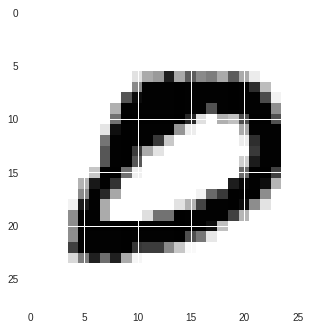

In [0]:
#print the image on train[54999]
import matplotlib.pyplot as plt
plt.imshow(x_train[54999], cmap=plt.cm.binary)
plt.show()

In [0]:
#normalizing the dataset
#it helps the model to train well

x_train, x_test = x_train / 255.0, x_test / 255.0
print(x_train[54999])

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00

In [0]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])



In [0]:
history = model.fit(x_train, y_train, epochs=20)

Epoch 1/20
60000/60000 [==============================] - 15s 244us/step - loss: 0.0813 - acc: 0.9775
Epoch 2/20
60000/60000 [==============================] - 16s 268us/step - loss: 0.0788 - acc: 0.9780
Epoch 3/20
60000/60000 [==============================] - 15s 242us/step - loss: 0.0772 - acc: 0.9780
Epoch 4/20
60000/60000 [==============================] - 15s 244us/step - loss: 0.0751 - acc: 0.9786
Epoch 5/20
60000/60000 [==============================] - 14s 240us/step - loss: 0.0734 - acc: 0.9794
Epoch 6/20
60000/60000 [==============================] - 14s 240us/step - loss: 0.0715 - acc: 0.9802
Epoch 7/20
60000/60000 [==============================] - 14s 236us/step - loss: 0.0696 - acc: 0.9804
Epoch 8/20
60000/60000 [==============================] - 14s 237us/step - loss: 0.0682 - acc: 0.9808
Epoch 9/20
60000/60000 [==============================] - 14s 240us/step - loss: 0.0661 - acc: 0.9816
Epoch 10/20
60000/60000 [==============================] - 14s 239us/step - loss: 

Text(0,0.5,'accuracy')

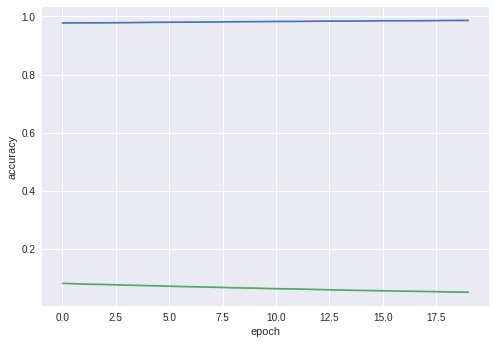

In [0]:
plt.plot(history.history['acc'])
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('accuracy')

In [0]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=20)

Epoch 1/20
60000/60000 [==============================] - 16s 258us/step - loss: 0.9963 - acc: 0.6841
Epoch 2/20
60000/60000 [==============================] - 19s 318us/step - loss: 0.5375 - acc: 0.8417
Epoch 3/20
60000/60000 [==============================] - 19s 321us/step - loss: 0.4257 - acc: 0.8741
Epoch 4/20
60000/60000 [==============================] - 18s 306us/step - loss: 0.3697 - acc: 0.8920
Epoch 5/20
60000/60000 [==============================] - 18s 303us/step - loss: 0.3294 - acc: 0.9047
Epoch 6/20
60000/60000 [==============================] - 19s 312us/step - loss: 0.2986 - acc: 0.9126
Epoch 7/20
60000/60000 [==============================] - 19s 318us/step - loss: 0.2754 - acc: 0.9194
Epoch 8/20
60000/60000 [==============================] - 19s 321us/step - loss: 0.2574 - acc: 0.9243
Epoch 9/20
60000/60000 [==============================] - 20s 336us/step - loss: 0.2414 - acc: 0.9285
Epoch 10/20
60000/60000 [==============================] - 20s 335us/step - loss: 

Text(0,0.5,'accuracy')

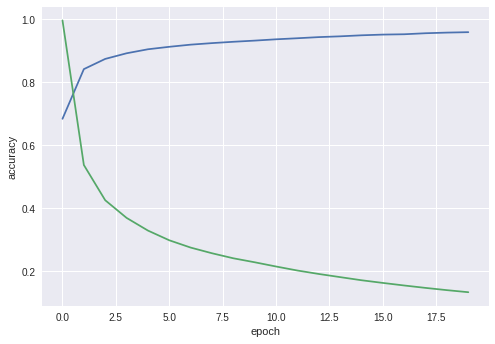

In [0]:
plt.plot(history.history['acc'])
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('accuracy')

In [0]:
model.evaluate(x_test, y_test)

# Using Keras on CNN

In [0]:
from keras import layers
from keras import models

from keras.datasets import mnist
from keras.utils import to_categorical
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

Using TensorFlow backend.


In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                36928     
__________

In [0]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
history = model.fit(train_images, train_labels, epochs=3, batch_size=64)

Epoch 1/3
60000/60000 [==============================] - 61s 1ms/step - loss: 0.1746 - acc: 0.9449
Epoch 2/3
60000/60000 [==============================] - 61s 1ms/step - loss: 0.0475 - acc: 0.9853
Epoch 3/3
60000/60000 [==============================] - 61s 1ms/step - loss: 0.0347 - acc: 0.9896


Text(0,0.5,'accuracy & loss')

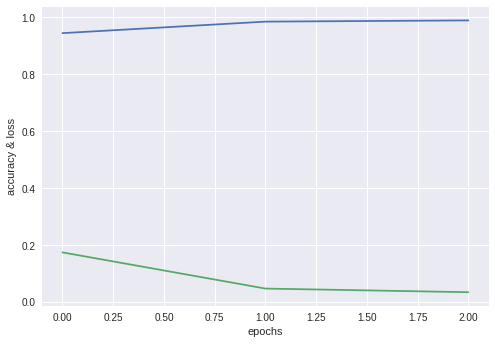

In [0]:
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['loss'])
plt.xlabel('epochs')
plt.ylabel('accuracy & loss')

In [0]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy is: ', ("%.2f"%(test_acc*100))+'%')

10000/10000 [==============================] - 4s 353us/step
Test accuracy is:  99.17%


In [0]:
print('Test accuracy is: ', ("%.2f"%(test_acc*100))+'%')

Test accuracy is:  99.11%
